## Análisis Descriptivo: ¿Quién llegará al número uno en Billboard 100?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
pwd

'/content'

## Cargamos los datos de entrada

In [3]:
artists_billboard=pd.read_csv('artists_billboard_fix3.csv',sep = ",",encoding = 'latin1')

In [4]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


La idea de empezar con head es entender como están los datos y que columnas hay, acá por ejm podemos ver que en el año de nacimiento estpa en decimal y hay valores con 0

In [6]:
artists_billboard.info() #informacion de la metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   durationSeg     635 non-null    float64
 9   top             635 non-null    int64  
 10  anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


In [8]:
artists_billboard.shape

(635, 11)

## ¿Cuántos alcanzaron el número 1?

In [11]:
#artists_billboard['top'].value_counts() #muestra los datos totales
artists_billboard['top'].value_counts(1) #muestra el % de cada uno

,proportion
top,
0,0.777953
1,0.222047


In [15]:
artists_billboard.groupby('top').size()

,0
top,
0,494
1,141


<Axes: xlabel='top', ylabel='count'>

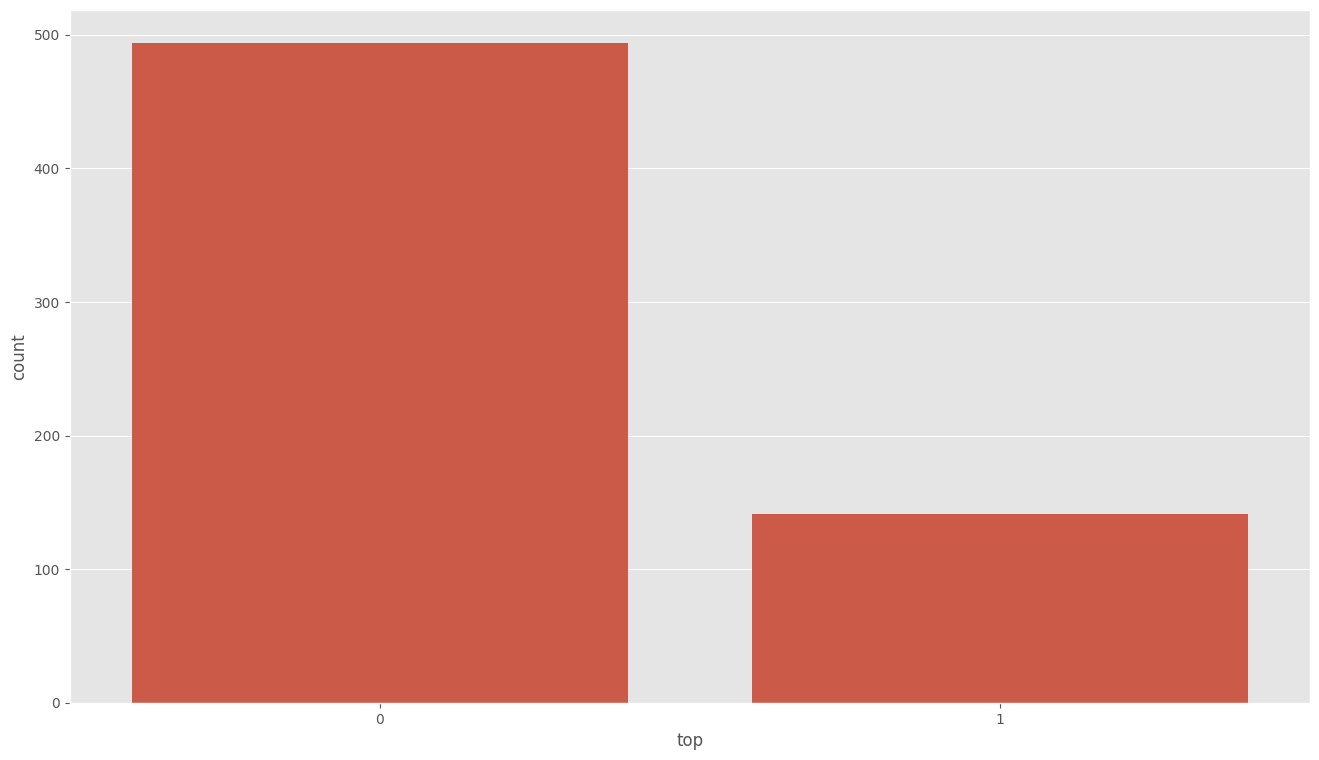

In [19]:
sns.countplot(x='top',data=artists_billboard)

In [17]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


<Axes: xlabel='genre', ylabel='durationSeg'>

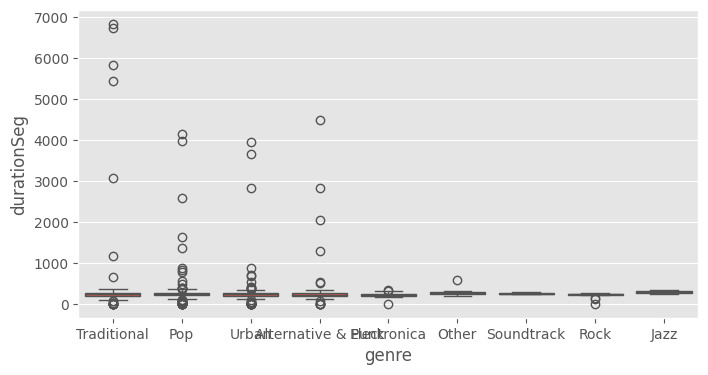

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='genre', y="durationSeg", data=artists_billboard)

In [24]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))

    return(x)

In [25]:
artists_billboard_tratamiento = artists_billboard[['durationSeg']].apply(lambda x: outlier_capping(x))

In [26]:
artists_billboard_tratamiento.describe()

,durationSeg
count,635.000000
mean,227.240630
std,84.984158
min,0.000000
25%,200.000000
50%,232.000000
75%,266.500000
max,401.400000


In [27]:
artists_billboard = pd.concat([artists_billboard.drop('durationSeg', axis=1), artists_billboard_tratamiento], axis=1)

In [28]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,206.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,0.0,232.0


In [29]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,0.222047,1548.590551,227.240630
std,183.452991,2.617996e+04,0.415950,820.470454,84.984158
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,0.000000,1969.000000,200.000000
50%,317.000000,2.014051e+07,0.000000,1981.000000,232.000000
75%,475.500000,2.014101e+07,0.000000,1986.000000,266.500000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000


<Axes: xlabel='artist_type', ylabel='durationSeg'>

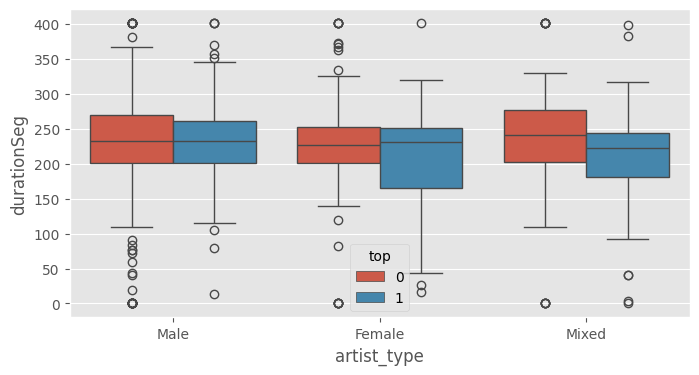

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(x="artist_type",y="durationSeg", hue="top", data=artists_billboard)

<Axes: xlabel='genre', ylabel='durationSeg'>

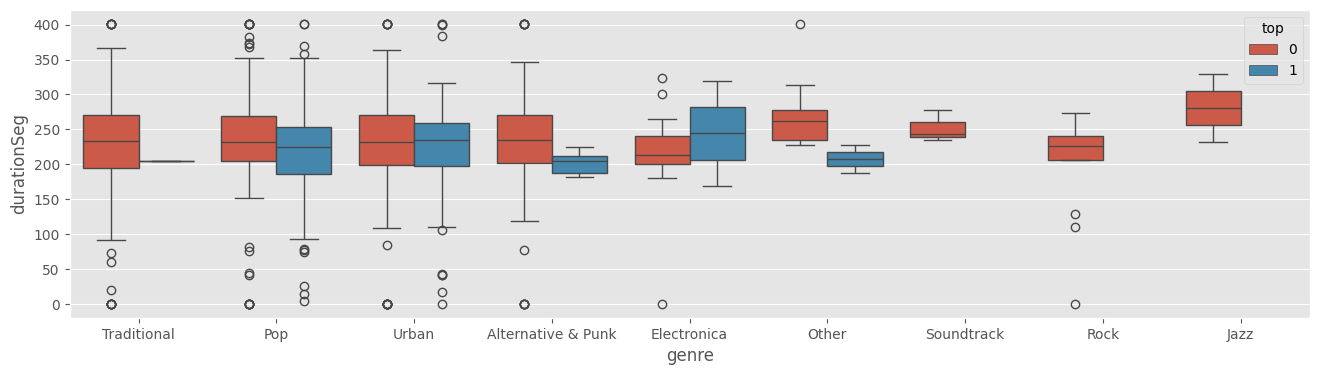

In [32]:
plt.figure(figsize=(16,4))
sns.boxplot(x="genre",y="durationSeg", hue="top", data=artists_billboard)

<Axes: xlabel='mood', ylabel='durationSeg'>

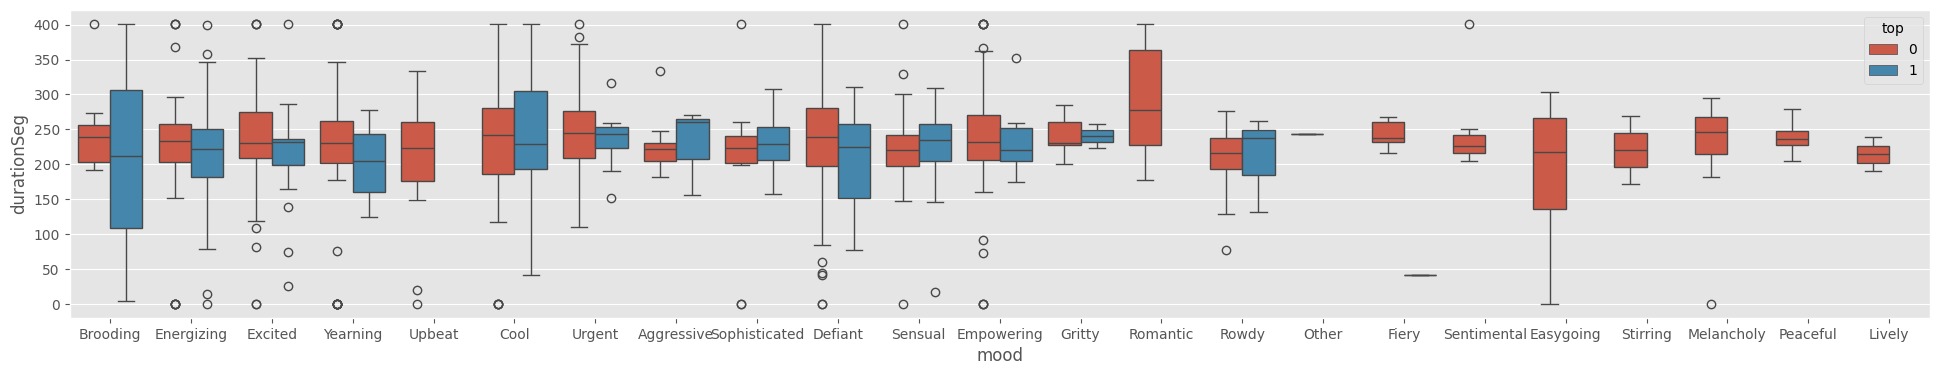

In [34]:
plt.figure(figsize=(24,4))
sns.boxplot(x="mood",y="durationSeg", hue="top", data=artists_billboard)

### Visualizamos los años de nacimiento de los artistas

<Axes: xlabel='anioNacimiento', ylabel='count'>

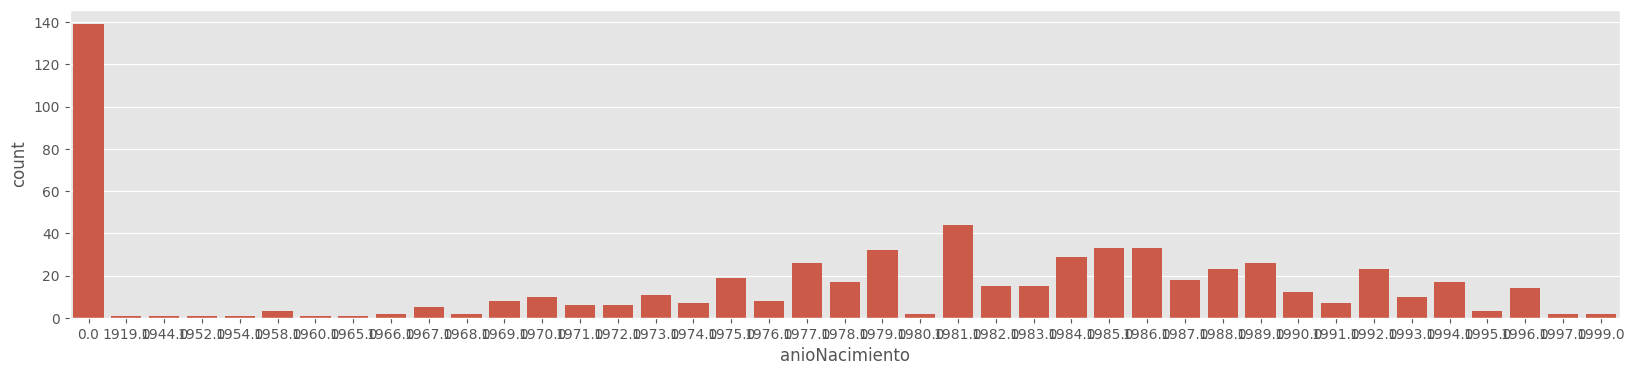

In [35]:
plt.figure(figsize=(20,4))
sns.countplot(x='anioNacimiento',data=artists_billboard)

In [ ]:
# prompt: tengo este codigo: sns.countplot(x='anioNacimiento',data=artists_billboard) quiero que el eje X sus etiquetas se pongan en orietnación vertical



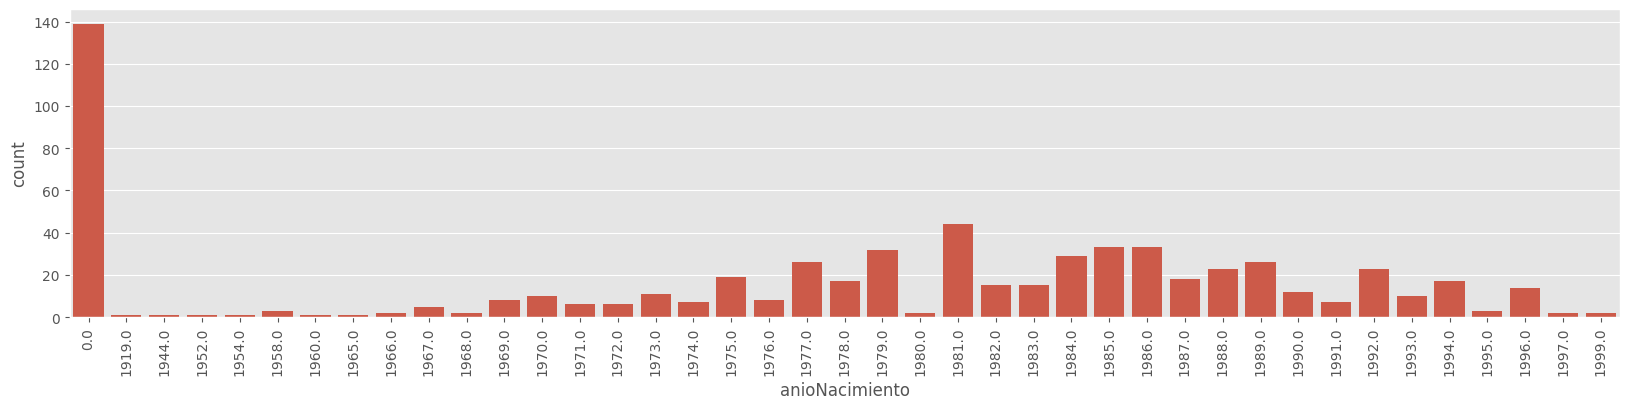

In [36]:
# prompt: tengo este codigo: sns.countplot(x='anioNacimiento',data=artists_billboard) quiero que el eje X sus etiquetas se pongan en orietnación vertical

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
sns.countplot(x='anioNacimiento', data=artists_billboard)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# prompt: quiero crear un grafico de barras horizontales de la variable anio de nacimiento



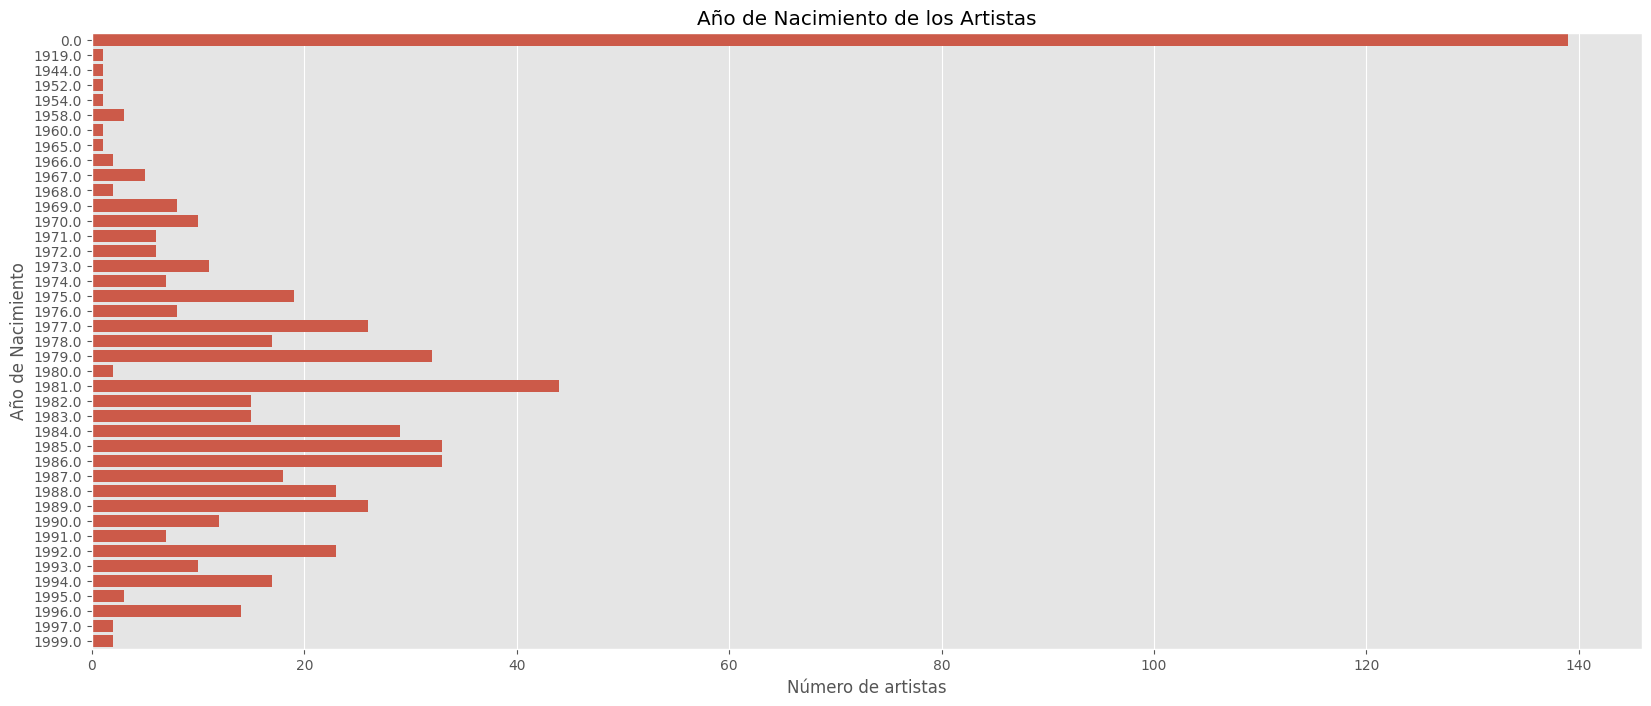

In [37]:
# prompt: quiero crear un grafico de barras horizontales de la variable anio de nacimiento

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))  # Ajusta el tamaño de la figura para mejor visualización
sns.countplot(y='anioNacimiento', data=artists_billboard) # Usa y='anioNacimiento' para barras horizontales
plt.xticks(rotation=0) # No es necesaria la rotación en este caso
plt.xlabel("Número de artistas")
plt.ylabel("Año de Nacimiento")
plt.title("Año de Nacimiento de los Artistas")
plt.show()


### Calculamos promedio de edad y asignamos a los registros Nulos

In [38]:
artists_billboard.head(2)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0


In [46]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);

In [47]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,206.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,0.0,232.0,NaN


In [48]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000,496.000000
mean,317.000000,2.013036e+07,0.222047,1548.590551,227.240630,30.102823
std,183.452991,2.617996e+04,0.415950,820.470454,84.984158,8.400788
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000,15.000000
25%,158.500000,2.014010e+07,0.000000,1969.000000,200.000000,24.000000
50%,317.000000,2.014051e+07,0.000000,1981.000000,232.000000,29.000000
75%,475.500000,2.014101e+07,0.000000,1986.000000,266.500000,35.000000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000,95.000000


In [49]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio

In [50]:
# en anioNacimiento se reemplazan los 0 por None para que no afecte los calculos
artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1);

In [51]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
count,635.000000,6.350000e+02,635.000000,496.000000,635.000000,496.000000
mean,317.000000,2.013036e+07,0.222047,1982.570565,227.240630,30.102823
std,183.452991,2.617996e+04,0.415950,8.346478,84.984158,8.400788
min,0.000000,2.004021e+07,0.000000,1919.000000,0.000000,15.000000
25%,158.500000,2.014010e+07,0.000000,1978.000000,200.000000,24.000000
50%,317.000000,2.014051e+07,0.000000,1984.000000,232.000000,29.000000
75%,475.500000,2.014101e+07,0.000000,1988.000000,266.500000,35.000000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000,95.000000


In [54]:
artists_billboard['edad_en_billboard'].isnull().sum()

age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()
np.random.seed(123)
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list

artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 29.881889763779526
Desvió Std Edad: 7.7482206904524205
Intervalo para asignar edad aleatoria: 22 a 37


In [55]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
count,635.000000,6.350000e+02,635.000000,496.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,0.222047,1982.570565,227.240630,29.881890
std,183.452991,2.617996e+04,0.415950,8.346478,84.984158,7.748221
min,0.000000,2.004021e+07,0.000000,1919.000000,0.000000,15.000000
25%,158.500000,2.014010e+07,0.000000,1978.000000,200.000000,25.000000
50%,317.000000,2.014051e+07,0.000000,1984.000000,232.000000,29.000000
75%,475.500000,2.014101e+07,0.000000,1988.000000,266.500000,34.000000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000,95.000000


<Axes: xlabel='edad_en_billboard', ylabel='count'>

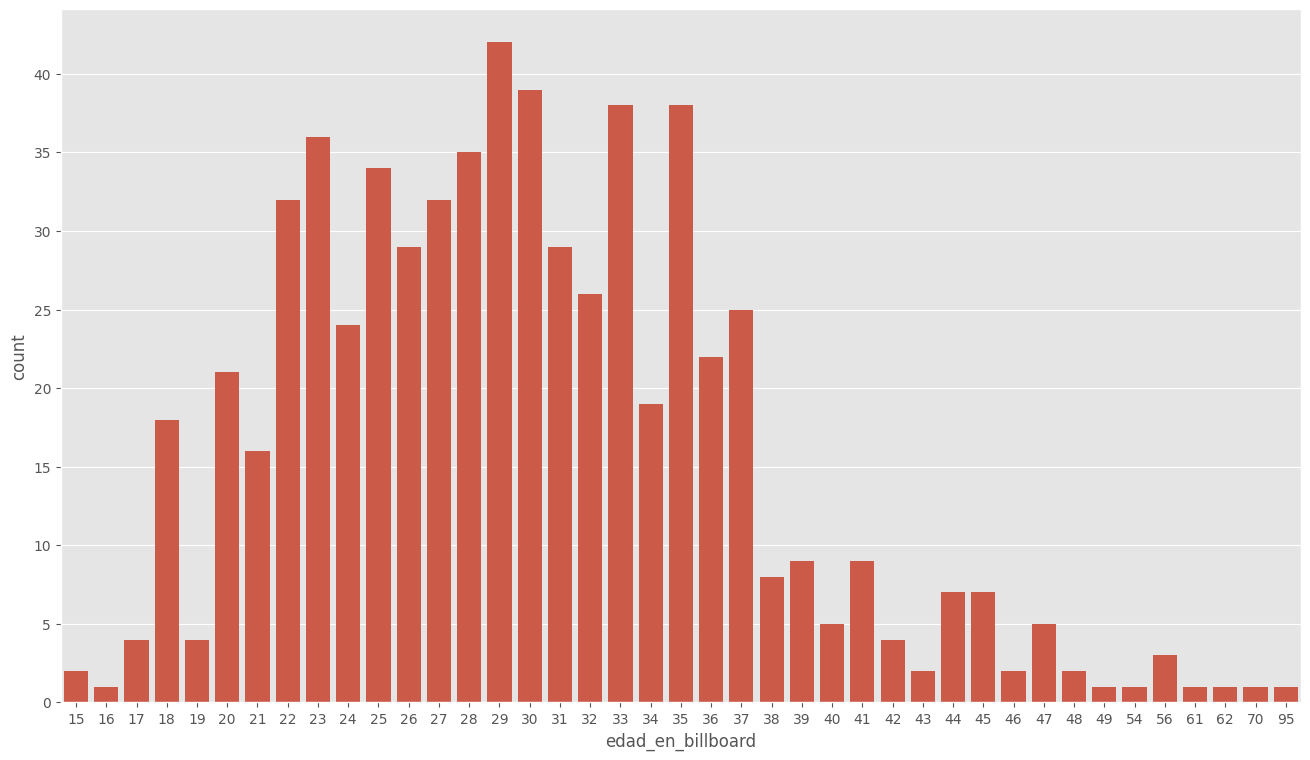

In [58]:
sns.countplot(x='edad_en_billboard',data=artists_billboard)

# Comparemos los Top y los No-top

### Buscamos si hay alguna relación evidente entre Año y duración de Canción

<Axes: xlabel='edad_en_billboard', ylabel='durationSeg'>

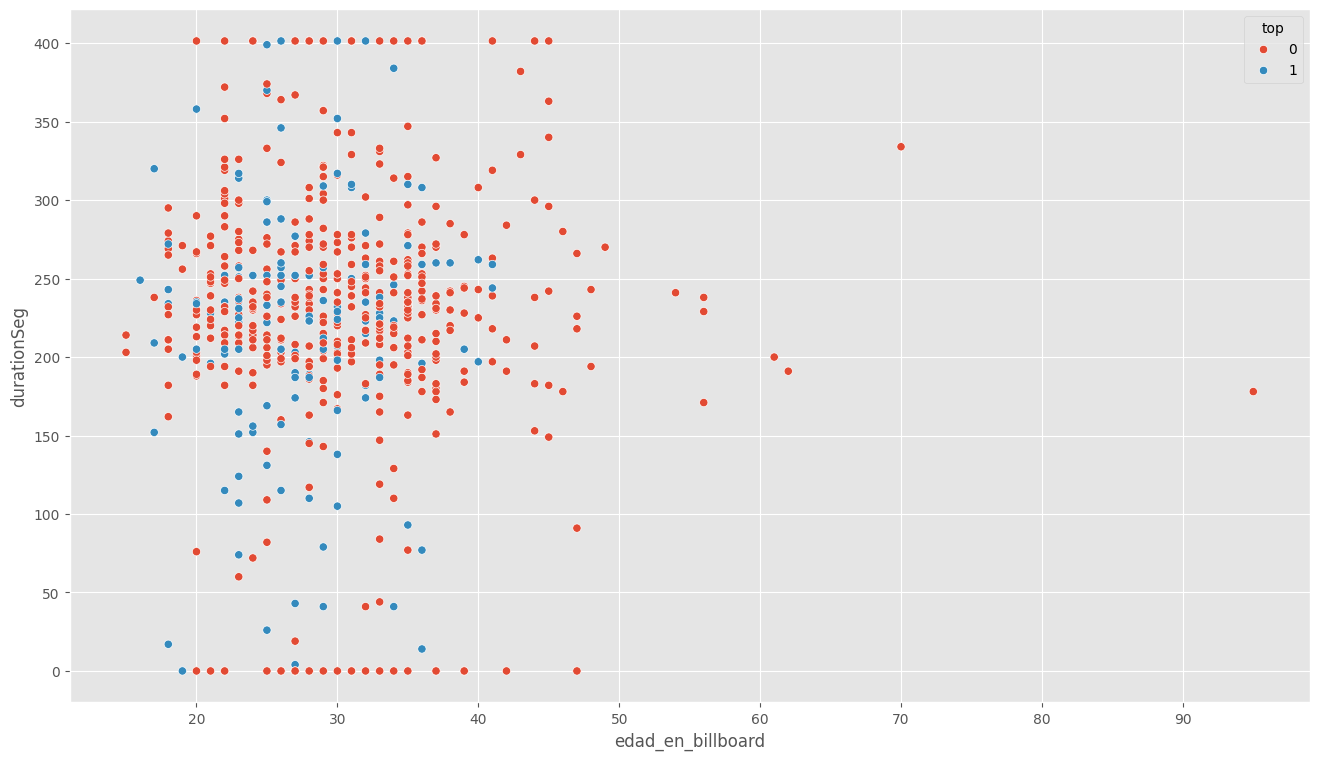

In [60]:
sns.scatterplot(x='edad_en_billboard',y='durationSeg',data=artists_billboard, hue='top')

<Axes: xlabel='genre', ylabel='edad_en_billboard'>

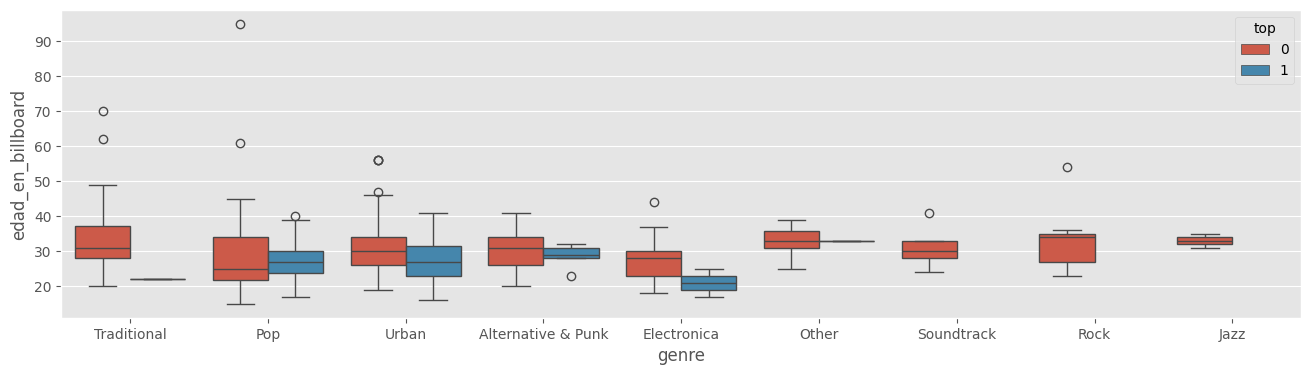

In [61]:
plt.figure(figsize=(16,4))
sns.boxplot(x="genre",y="edad_en_billboard", hue="top", data=artists_billboard)

In [63]:
artists_billboard['top'].value_counts(1)

,proportion
top,
0,0.777953
1,0.222047


## Visualicemos los Atributos de entrada

,proportion
artist_type,
Male,0.609449
Female,0.240945
Mixed,0.149606


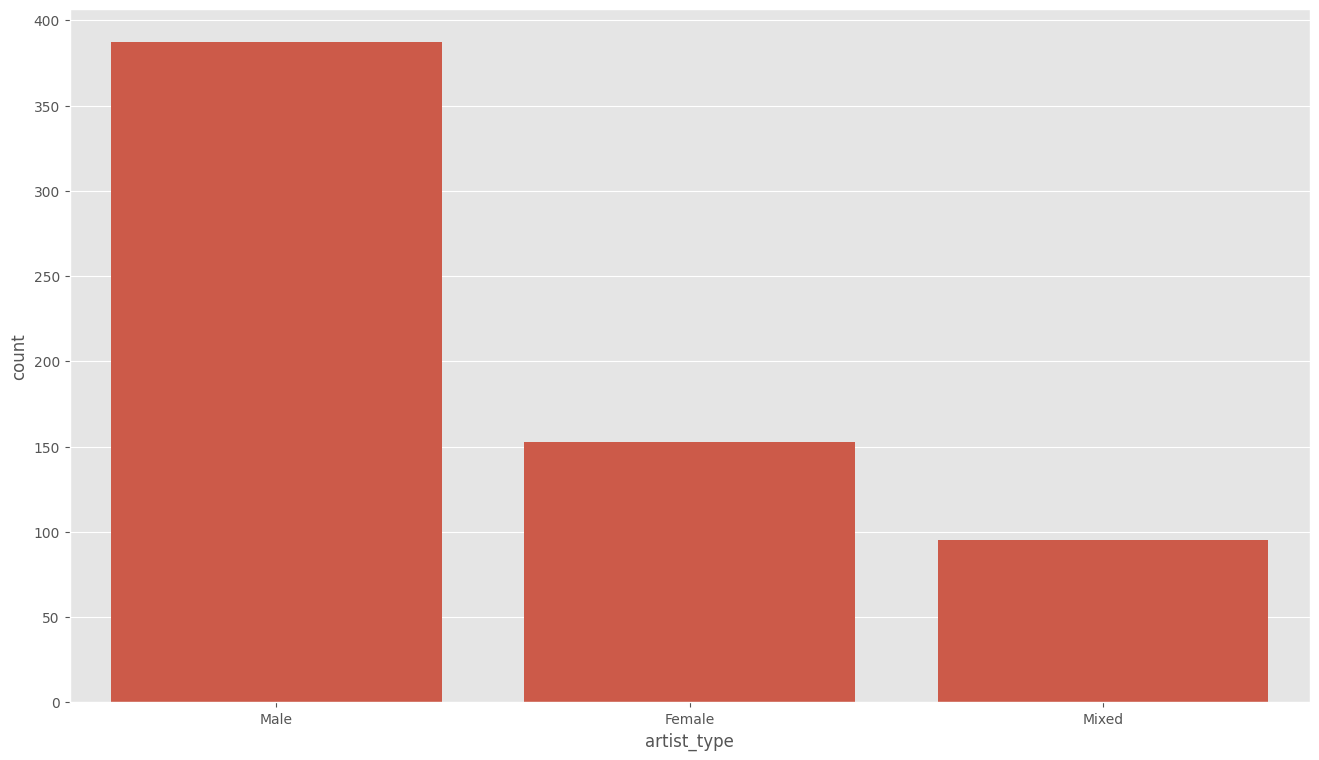

In [62]:
sns.countplot(x='artist_type',data=artists_billboard)
artists_billboard['artist_type'].value_counts(1)

artist_type   top              
              count sum      mean
0      Female   153  49  0.320261
1        Male   387  63  0.162791
2       Mixed    95  29  0.305263

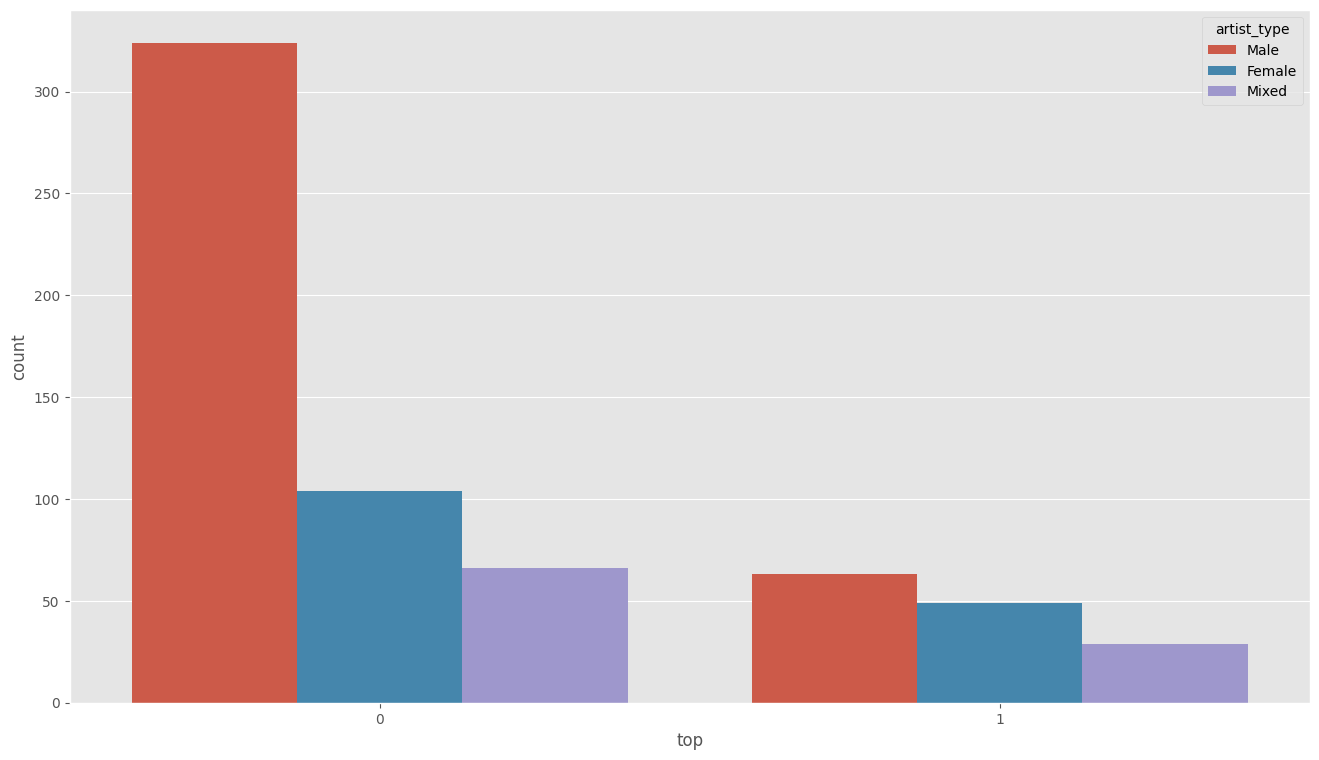

In [64]:
sns.countplot(x='top',data=artists_billboard,hue='artist_type')
artists_billboard[['artist_type','top']].groupby(['artist_type'], as_index=False).agg(['count','sum','mean'])

mood   top              
                  count sum      mean
0      Aggressive    11   3  0.272727
1        Brooding    14   3  0.214286
2            Cool    78  27  0.346154
3         Defiant    64   5  0.078125
4       Easygoing     4   0  0.000000
5      Empowering    88  10  0.113636
6      Energizing    71  33  0.464789
7         Excited    62  19  0.306452
8           Fiery     6   1  0.166667
9          Gritty     9   2  0.222222
10         Lively     2   0  0.000000
11     Melancholy    10   0  0.000000
12          Other     1   0  0.000000
13       Peaceful     4   0  0.000000
14       Romantic     7   0  0.000000
15          Rowdy    15   3  0.200000
16        Sensual    55  17  0.309091
17    Sentimental     7   0  0.000000
18  Sophisticated    15   4  0.266667
19       Stirring     2   0  0.000000
20         Upbeat    12   0  0.000000
21         Urgent    30   8  0.266667
22       Yearning    68   6  0.088235

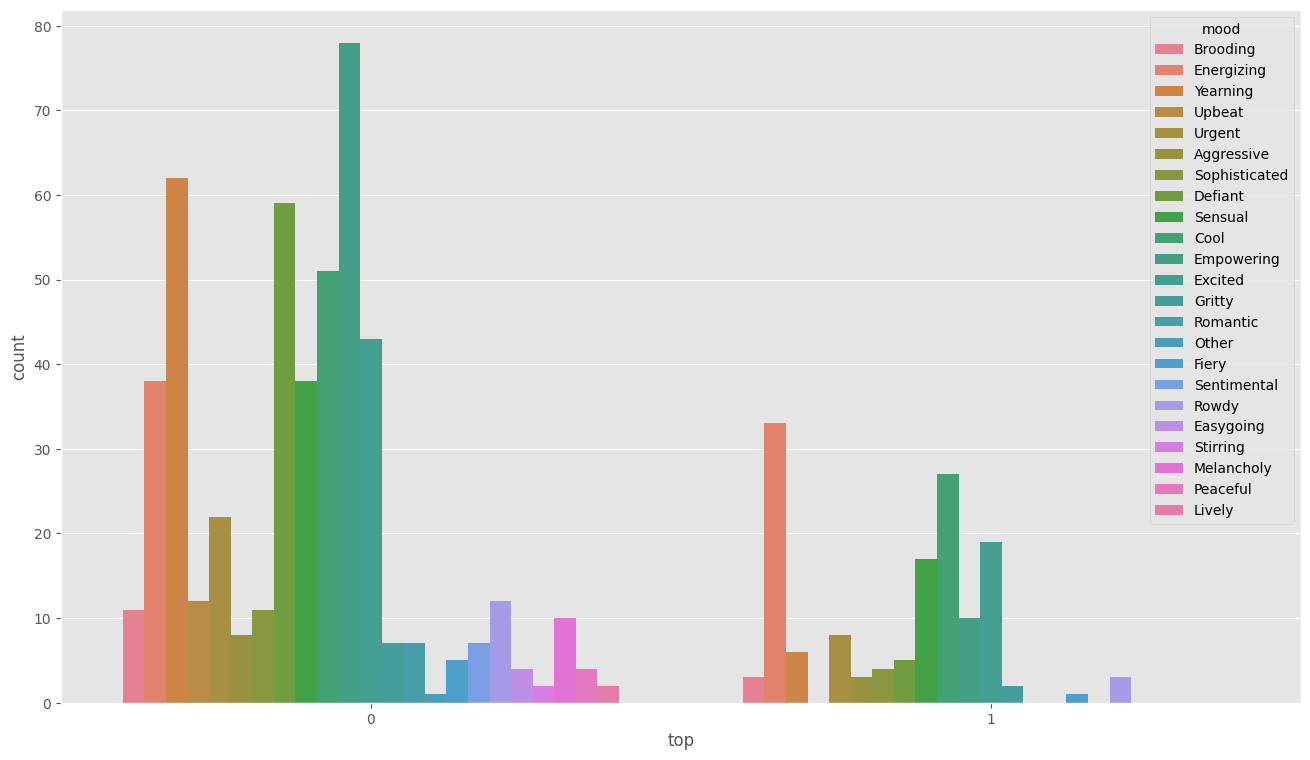

In [65]:
sns.countplot(x='top',data=artists_billboard,hue='mood')
artists_billboard[['mood','top']].groupby(['mood'], as_index=False).agg(['count','sum','mean'])

tempo   top               
                count  sum      mean
0    Fast Tempo    53   12  0.226415
1  Medium Tempo   517  113  0.218569
2    Slow Tempo    65   16  0.246154

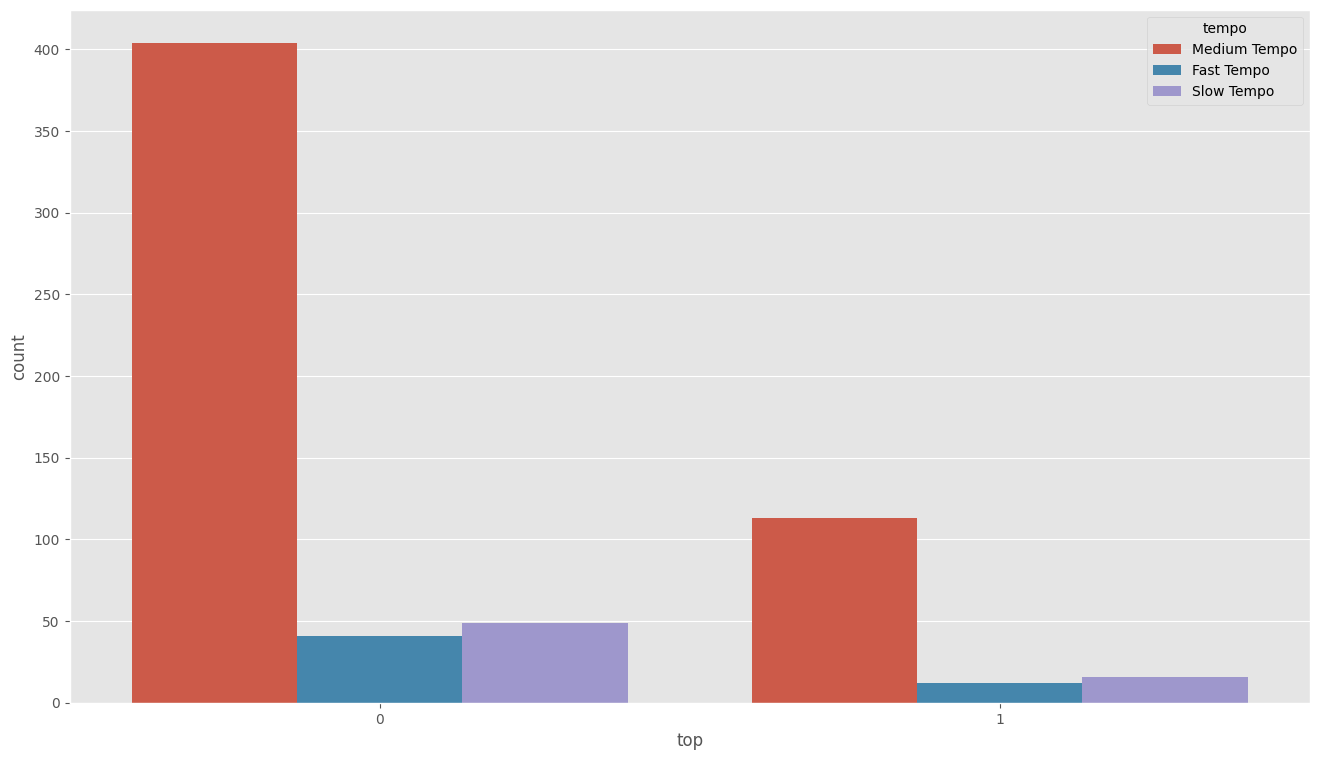

In [66]:
sns.countplot(x='top',data=artists_billboard,hue='tempo')
artists_billboard[['tempo','top']].groupby(['tempo'], as_index=False).agg(['count','sum','mean'])

genre   top              
                      count sum      mean
0  Alternative & Punk    60   5  0.083333
1         Electronica    27   2  0.074074
2                Jazz     2   0  0.000000
3               Other    12   2  0.166667
4                 Pop   188  60  0.319149
5                Rock    13   0  0.000000
6          Soundtrack     5   0  0.000000
7         Traditional   113   1  0.008850
8               Urban   215  71  0.330233

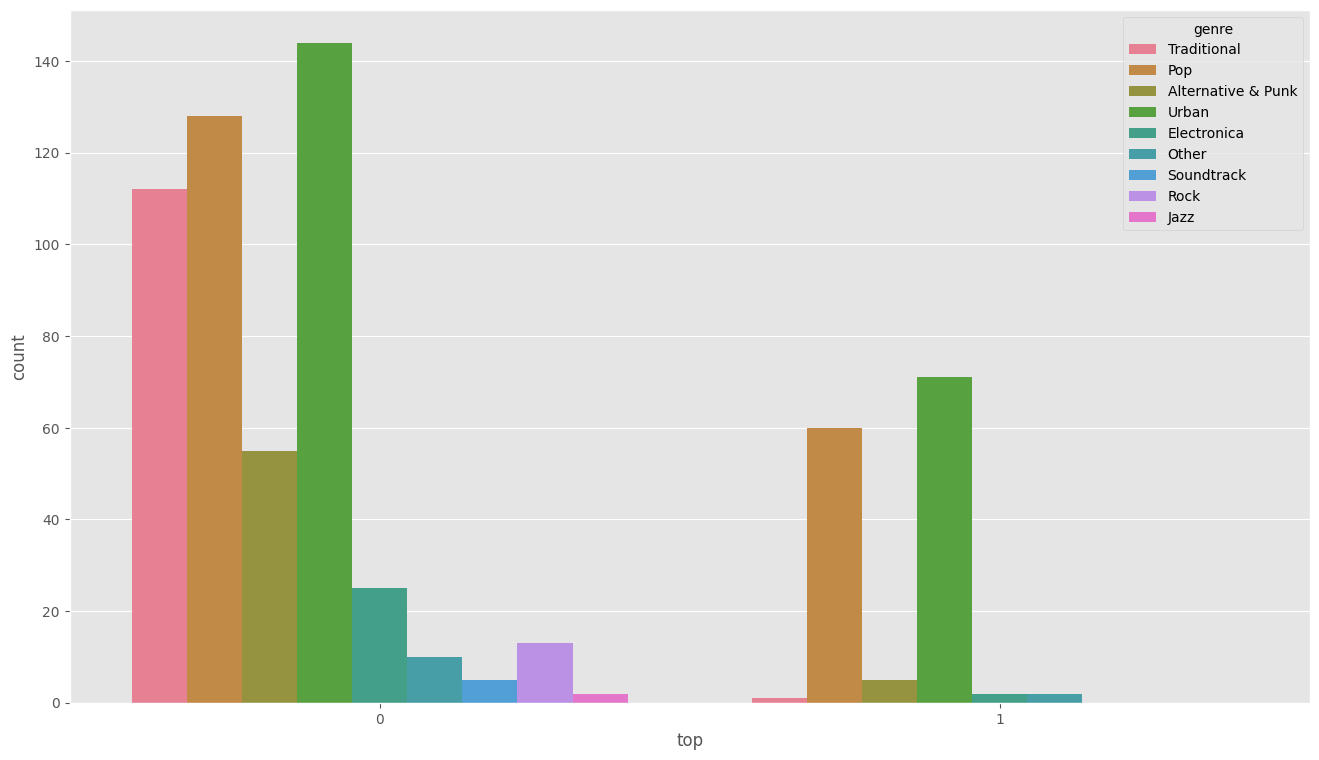

In [67]:
sns.countplot(x='top',data=artists_billboard,hue='genre')
artists_billboard[['genre','top']].groupby(['genre'], as_index=False).agg(['count','sum','mean'])

In [71]:
# Mood Mapping
artists_billboard['moodEncoded'] = artists_billboard['mood'].map( {'Energizing': 6,
                                        'Empowering': 6,
                                        'Cool': 5,
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3,
                                        'Sensual': 2,
                                        'Gritty': 3, #coraje
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3,
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4,
                                        'Romantic': 2,
                                        'Peaceful': 1,
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)

In [72]:
# Tempo Mapping
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)

In [73]:
# Genre Mapping
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( {'Urban': 4,
                                          'Pop': 3,
                                          'Traditional': 2,
                                          'Alternative & Punk': 1,
                                         'Electronica': 1,
                                          'Rock': 1,
                                          'Soundtrack': 0,
                                          'Jazz': 0,
                                          'Other':0,'':0}
                                       ).astype(int)

In [74]:
# artist_type Mapping
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)


In [ ]:
# Mapping edad en la que llegaron al billboard
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4

In [75]:
# Mapping Song Duration
artists_billboard.loc[ artists_billboard['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[ artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

In [76]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,durationEncoded
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0,39,4,2,2,3,2.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0,25,6,2,3,2,6.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0,21,5,2,4,1,3.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,206.0,25,4,2,1,3,2.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,NaN,232.0,24,4,2,2,2,3.0


In [82]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = artists_billboard.drop(drop_elements, axis = 1)

### Analizamos nuestros datos de Entrada Categóricos

In [80]:
artists_encoded.head(10)

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,durationEncoded
0,0,4,2,2,3,2.0
1,0,6,2,3,2,6.0
2,1,5,2,4,1,3.0
3,0,4,2,1,3,2.0
4,0,4,2,2,2,3.0
5,0,5,2,2,3,3.0
6,1,5,1,4,2,0.0
7,0,3,0,3,3,6.0
8,0,4,2,4,2,2.0
9,0,4,2,1,3,6.0


In [81]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,6.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

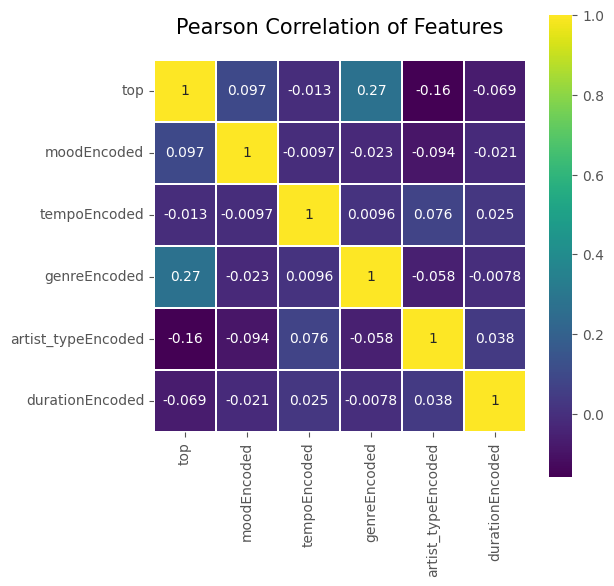

In [83]:
colormap = plt.cm.viridis
plt.figure(figsize=(6,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(artists_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [84]:
from sklearn.feature_selection import SelectKBest

In [94]:
X=artists_encoded.drop(['top'], axis=1)
y=artists_encoded['top']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['moodEncoded', 'genreEncoded', 'artist_typeEncoded'], dtype='object')


In [87]:
artists_encoded[['genreEncoded', 'top']].groupby(['genreEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

genreEncoded       top          
                    mean count sum
0            0  0.105263    19   2
1            1  0.070000   100   7
2            2  0.008850   113   1
3            3  0.319149   188  60
4            4  0.330233   215  71

In [88]:
artists_encoded[['artist_typeEncoded', 'top']].groupby(['artist_typeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

artist_typeEncoded       top          
                          mean count sum
0                  1  0.305263    95  29
1                  2  0.320261   153  49
2                  3  0.162791   387  63

In [89]:
artists_encoded[['genreEncoded', 'top']].groupby(['genreEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

genreEncoded       top          
                    mean count sum
0            0  0.105263    19   2
1            1  0.070000   100   7
2            2  0.008850   113   1
3            3  0.319149   188  60
4            4  0.330233   215  71

In [90]:
artists_encoded[['tempoEncoded', 'top']].groupby(['tempoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

tempoEncoded       top           
                    mean count  sum
0            0  0.226415    53   12
1            1  0.246154    65   16
2            2  0.218569   517  113

In [91]:
artists_encoded[['durationEncoded', 'top']].groupby(['durationEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

durationEncoded       top          
                       mean count sum
0             0.0  0.295775    71  21
1             1.0  0.333333    30  10
2             2.0  0.212963   108  23
3             3.0  0.202381   168  34
4             4.0  0.232143   112  26
5             5.0  0.145455    55   8
6             6.0  0.208791    91  19